## plot pedestal and noise from pedestal calibration analysis

H2042 H30 /home/ye/tmp/pedestal_scan/2021_03_11_001/
/home/ye/tmp/pedestal_scan/2021_03_11_001/H30rawframe_data.dat
(768, 256, 103)
dict_keys(['cm_data', 'cm_mean', 'cm_noise', 'mean', 'noise', 'hits', 'cm_vals'])


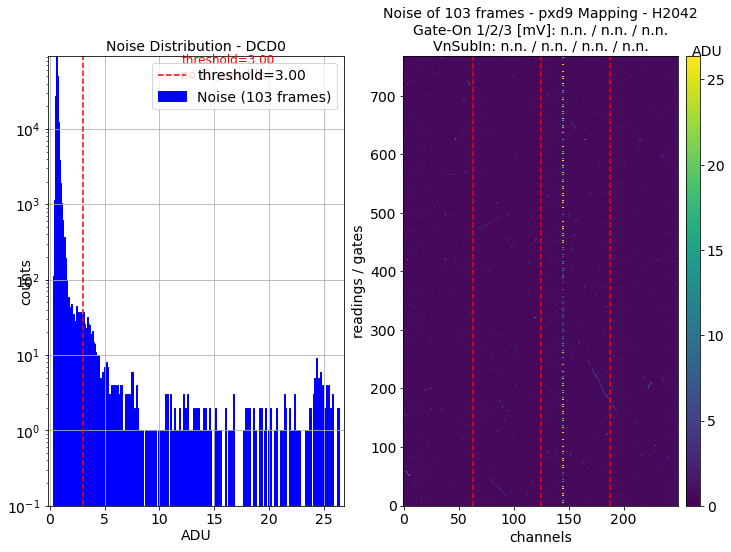

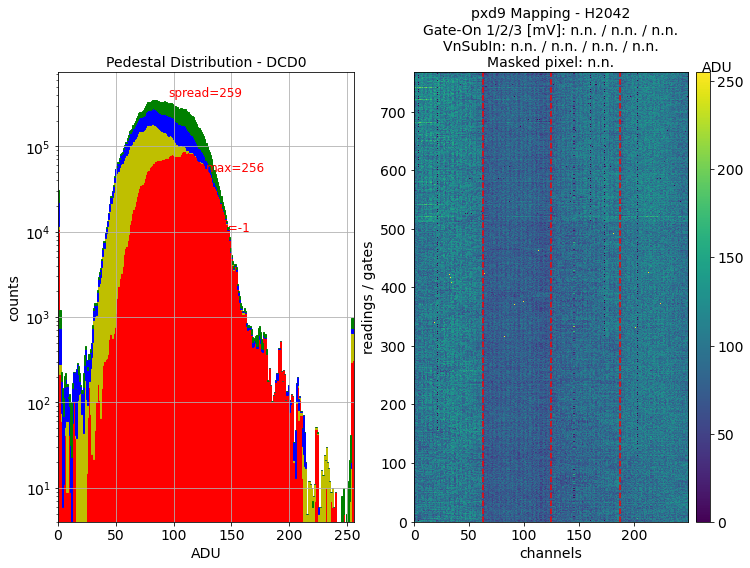

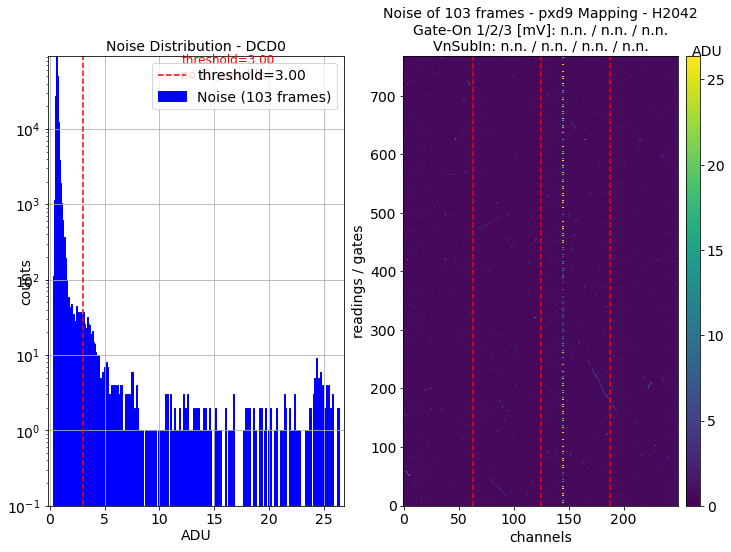

In [3]:
import config_utils
import file_utils
import mapping
import numpy as np
import os
from matplotlib import pyplot as plt
from calibrations.pedestal.analysis import calculate_pedestal_with_cm
import plots
from epics_utils import get_pv

path = '/home/ye/tmp/pedestal_scan/2021_03_11_001/'

dhc = 'H30'
dhe = 'H2042'

print(dhe,dhc,path)

module_flavor = get_pv("PXD:B:config-"+dhe,"module_type:VALUE:set").get()
# module_flavor = 'ob'

mapper = mapping.mapper(module_type='pxd9', module_flavor=module_flavor, asicpair=0)

# filename = '/Data2/W56-OB2/power_cycle_scan/2021_03_17_004/H20_pedestals_loop_005.dat'
filename = os.path.join(path, "%srawframe_data.dat" % dhc)
print(filename)

try:
    data = file_utils.read_raw_file(filename, dhe, asicpair= 0,
                                frames=200, use_header=True, skip_broken_frames=True)[0]
except Exception as e:
    print(e)

print(data.shape)

# nframes = data.shape[2]

drain_mask = np.full(256, False, dtype=np.bool)
drain_mask[10:16] = True

result = calculate_pedestal_with_cm(data, drain_mask,threshold=5)

# ped = result['cm_data']

print(result.keys())

plots.plot_pedestals(data=result['cm_data'], module=dhe, device='pxd9', module_type=module_flavor, asicpair=0)

plots.plot_noise(data=result['cm_data'], device='pxd9', module=dhe, module_type=module_flavor, asicpair=0)